# Продвинутое машинное обучение: ДЗ 1

Ссылка на задание: https://docs.google.com/document/d/1snU4dXicuPmFz9XjTF8c7nSw0qGdJAgdJeZVrg-NakI/edit#

## Часть I: О теореме Байеса
Первая часть состоит из двух вопросов и одного задания. Смысл её в том, чтобы провести вероятностные рассуждения в ситуациях, когда модель сама по себе очень простая, но её ещё надо правильно построить, правильно отобразить жизненную ситуацию. Поэтому на первые два вопроса рекомендую давать развёрнутые ответы; эти ответы лучше писать прямо в ноутбуке, LaTeX в jupyter работает на вполне достаточном для нас уровне.

### Задание 1
Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.

### Решение
События:
 - A -  у подсудимого эта группа крови [ P(A) = 0.01 ]  
 - not A -  у подсудимого не эта группа крови  
 - H - подсудимый виновен  
 - not H - подсудимы невиновен  

  
  
Ошибки прокурора:
1. Прокурор хотел посчитал вероятность P(A|H), а нужно P(H|A).  
2. Прокурор назвал вероятность P(not A), вместо того что хотел [ он хотел P(A|H)].  
3. Прокурор вывел формулу P(A|H) + P(A|not H) = 1, что тоже неверно. Правильно P(A|H) P(H) + P(A|notH) P(notH) + P(notA|H) P(H) + P(notA|notH) P(notH) = 1 .

Данную задачу нужно решать по следующей формуле Байеса: P(H|A) = P(A|H) P(H) / P(A)


### Задание 2
Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?

### Решение
События:
 - A -  у подсудимого эта группа крови [ P(A) = 0.01 ]  
 - not A -  у подсудимого не эта группа крови  
 - H - подсудимый виновен  
 - not H - подсудимы невиновен  

Ошибки адвоката:
1. Прокурор хотел посчитать вероятность P(H), а нужно P(H|A).  
2. Прокурор назвал вероятность P(A), вместо того что хотел [ он хотел P(H)]  

Данную задачу нужно решать по следующей формуле Байеса: P(H|A) = P(A|H) P(H) / P(A)


### Задание 3

Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?


Обозначения:
 - t=1 - положительный результат.  
 - t=0 - отрицательный результат.  
 - d=1 - болен  
 - d=0 - здоров  

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.integrate as integrate
from sklearn import linear_model

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (15,8)
legend_fontsize = 16

Апостериорная вероятность после положительного теста: 0.161017
Апостериорная вероятность после отрицательного теста: 0.000531


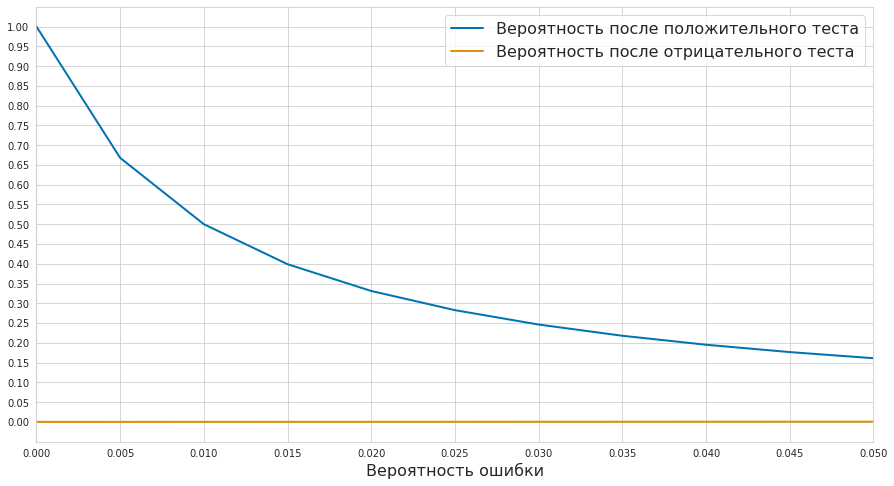

In [ ]:
## если data = 1, тест положительный
def compute_posterior(data, prior_prob=0.01, test_success=0.95):
    if data == 1:
        return (prior_prob * test_success) / (prior_prob * test_success + (1-prior_prob) * (1-test_success))
    elif data == 0:
        return (prior_prob * (1-test_success)) / (prior_prob * (1-test_success) + (1-prior_prob) * test_success)
    else:
        return None

print("Апостериорная вероятность после положительного теста: %.6f" % compute_posterior(1) )
print("Апостериорная вероятность после отрицательного теста: %.6f" % compute_posterior(0) )

vector_posterior = np.vectorize(compute_posterior, excluded=['data', 'test_success'])
xs = np.arange(0, 0.051, 0.005)
ys_one = vector_posterior(1, test_success=1.-xs)
ys_zero = vector_posterior(0, test_success=1.-xs)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(xs, ys_one, linewidth=2, label=r'Вероятность после положительного теста')
ax.plot(xs, ys_zero, linewidth=2, label='Вероятность после отрицательного теста')
plt.xticks(np.arange(0, .051, .005))
plt.yticks(np.arange(0, 1.01, .05))
ax.set_xlim((0.0, 0.05))
ax.set_xlabel('Вероятность ошибки', fontsize=legend_fontsize)
ax.legend(fontsize=legend_fontsize)
# fig.savefig('intro1.pdf', bbox_inches='tight')
plt.show()

**Выводы**
1. Уменьшение вероятности ложноотрицательного результата почти не меняет апостериорную вероятность. 
2. Уменьшение вероятности ложноположительного результата значительно влияет на апостериорную вероятность. 
3. Борьба с ложно положительными результатами принесет гораздо больший эффект, чем борьба с ложноотрицательными результатами.

## Часть II: О линейной регрессии
Эта часть первого домашнего задания связана с анализом конкретного датасета. Датасет давайте возьмём довольно релевантный реальной жизни; он доступен по следующей ссылке:
https://ourworldindata.org/coronavirus-source-data


### Задание 1
Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.


In [100]:
from google.colab import drive
drive.mount("/content/gdrive")

import numpy as np
import pandas as pd
import datetime

fpath_data = "/content/gdrive/MyDrive/MADE/AML01/owid-covid-data.csv"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [101]:
def get_data(fpath):
  start_date = "2020-03-01"
  d_full = pd.read_csv(fpath, parse_dates=["date"])
  d_full = d_full.sort_values("date")
  d_full = d_full.loc[d_full.location=="Russia"] #выберите из таблицы данные по России
  # для упрощения обработки можно заменить в столбце new_cases все нули на единицы.
  # в чате был комментари заменять также и значения меньше 0
  d_full.loc[d_full.new_cases<=0, "new_cases"] = 1 
  d_full = d_full[(start_date <= d_full.date)].reset_index(drop=True)
  d_full["day_num"] = [c for c in d_full.index]
  d_full["target"] = np.log(d_full.total_cases.values)
  finish_train = datetime.datetime.strptime("2020-03-01", "%Y-%m-%d") + \
      datetime.timedelta(days=50)
  d_train = d_full[d_full.date <= finish_train]
  # остальные данные можно использовать в качестве тестового набора
  d_test = d_full[(finish_train <d_full.date)]
  return d_train, d_test



### Задание 2
Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем:
1. Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.

2. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).

3. Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).


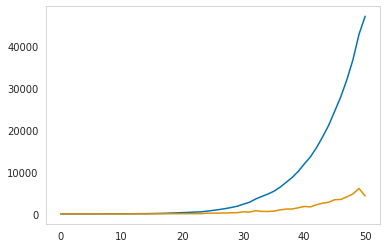

In [102]:
from sklearn.linear_model import LinearRegression
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
legend_fontsize = 16

d_train, d_test = get_data(fpath_data)
N = d_train.shape[0]

plt.plot(d_train.day_num, d_train.total_cases)
plt.plot(d_train.day_num, d_train.new_cases)
plt.grid()

In [103]:
xs = np.linspace(-5, 5, N)
X = np.linspace(-5, 5, N)
Y = np.linspace(-5, 5, N)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def myplot_heatmap(Z):
    # Make the plot
    plt.axis('equal')
    plt.xlim((-5, 5))
    plt.ylim((-5, 5))
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)

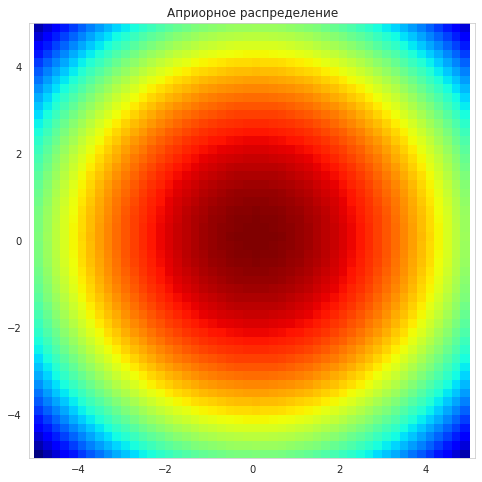

In [129]:
cur_mu, cur_sigma = np.array([0, 0]), 6e1*np.array([[1, 0], [0, 1]])

# здесь нужно использовать логнормальное распределение
Z = np.log(multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-2, 2))
ax.set_title("Априорное распределение")
myplot_heatmap(Z)

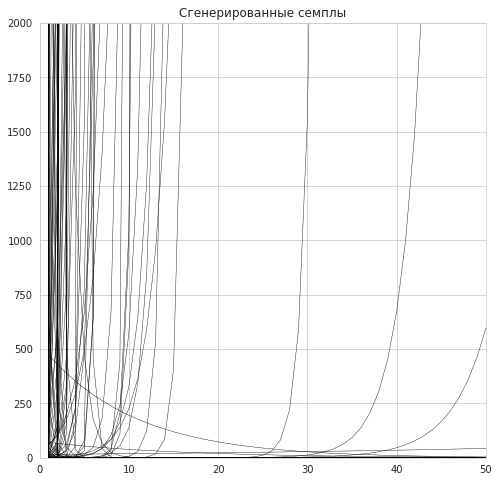

In [130]:
def myplot_sample_lines(mu, sigma, n=20, points=None):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu, sigma, n)

    # plt.axis('equal')
    xs = np.linspace(1, 200, 200)
    for w in my_w:
        ys = np.exp(w[0] + w[1]*xs)
        plt.plot(xs, ys, 'k-', lw=.4)
    plt.ylim((0, 2000))
    plt.xlim((0, 50))
    if not points is None:
        plt.scatter(points[0], points[1], marker='*', s=200)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-2, 2))
ax.set_title("Сгенерированные семплы")
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=RuntimeWarning)
    myplot_sample_lines(cur_mu, cur_sigma, 200)

In [131]:
def print_pred(mu, sigma, n=20):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu, sigma, n)
    xs = np.linspace(1, 200, 200)
    vals = {
        "2020-05-01": [],
        "2020-06-01": [],
        "2020-07-01": [],
        "2020-09-01": []
    }
    for w in my_w:
        ys = np.exp(w[0] + w[1]*xs)
        vals["2020-05-01"].append(ys[61])
        vals["2020-06-01"].append(ys[92])
        vals["2020-07-01"].append(ys[122])
        vals["2020-09-01"].append(ys[184])
    print("Прогнозы на определенные даты из задания:")
    for k, v in vals.items():
      v_arr = np.array(v)
      v_fin = v_arr[np.isfinite(v_arr)]
      # print(f"Прогнозы на {k}: {np.mean(v_fin)}+/-{np.std(v_fin)}")
      print(f"  Прогнозы на {k}: {v}")

print(
    "Соответствие между датами и номерами дней:",
    d_test.loc[
        d_test.date.isin({"2020-05-01", "2020-06-01", "2020-07-01", "2020-09-01"}),
        ["date", "day_num"]
    ],
    sep="\n"
)
print()
print_pred(cur_mu, cur_sigma, n=20)


Соответствие между датами и номерами дней:
          date  day_num
61  2020-05-01       61
92  2020-06-01       92
122 2020-07-01      122
184 2020-09-01      184

Прогнозы на определенные даты из задания:
  Прогнозы на 2020-05-01: [1.372394414697777e+29, 1.4258980726863804e+99, 4147282455.391219, 1.455627695713031e-125, 8.460143394641727e-12, 9.355881022531252e+202, 1.4192205319961695e+156, 6.615021270217561e+79, inf, 1.2181831667197105e+277, 6.048603535715181e+195, 2.3965940767384287e+141, 2.3695029616056787e-253, 3.0615201923775806e-247, 4.831858829838659e-102, 2.7726994553320133e-145, 0.037416651081838476, 5.001796833077813e+193, 2.453993706512544e-125, 1.056097669248696e+99]
  Прогнозы на 2020-06-01: [5.907705932723828e+42, 1.1572245991497705e+151, 1669489246227419.0, 1.7331029301465207e-186, 1.3922478412362393e-18, 4.976748348246981e+303, 2.333543031716112e+237, 1.2607768421471537e+121, inf, inf, 2.3767985002088263e+292, 1.2357975944154497e+212, 0.0, 0.0, 3.1759447185603923e-153,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


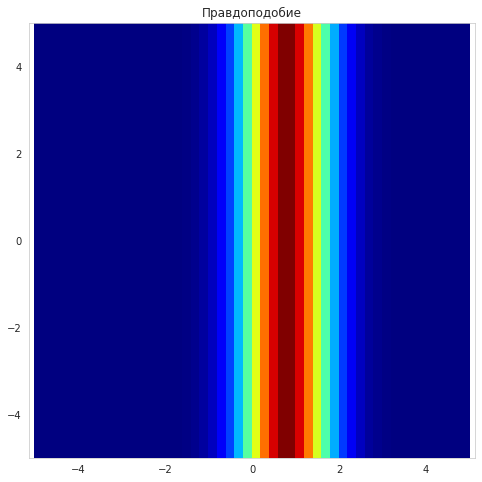

In [132]:
def get_likelihood(px, py, sigma=.025):
    return lambda x : np.exp(-(x[0] + x[1]*px - py) ** 2) / (2 * sigma * np.sqrt(2.*np.pi))

px, py = d_train.day_num[0], d_train.target[0]
cur_likelihood = get_likelihood(px, py)
Z = np.array(
  [
    [
      cur_likelihood(pos[i, j]) for j in range(pos.shape[1])
    ] for i in range(pos.shape[0])
  ]
)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlim((-2, 2))
ax.set_ylim((-2, 2))
ax.set_title("Правдоподобие")
myplot_heatmap(Z)


In [133]:
def bayesian_update(mu, sigma, x, y, sigma_noise=0.25):
    x_matrix = np.array([[1, x]])
    sigma_n = np.linalg.inv(
        np.linalg.inv(sigma)
        +
        (1 / (sigma_noise ** 2))
        *
        np.matmul(np.transpose(x_matrix), x_matrix)
    )
    mu_n = np.matmul(
        sigma_n, 
        np.matmul(
            np.linalg.inv(sigma), 
            np.transpose(mu)
        ) 
        + 
        (1 / (sigma_noise ** 2)) 
        * 
        np.matmul(np.transpose(x_matrix), np.array([y]) ) 
    )
    return mu_n, sigma_n


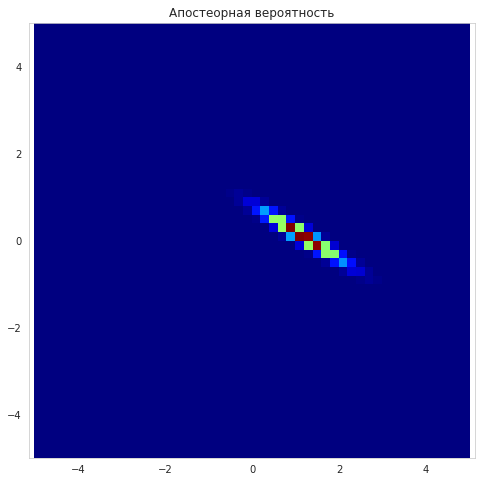

In [134]:
for px, py in d_train.loc[
    1:2,
    ["day_num", "target"]
].apply(tuple, axis=1).tolist():
    cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, px, py)
# px, py = d_train.exp_day_num[1], d_train.total_cases[1]
# cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, px, py)
Z = multivariate_normal.pdf(
    pos, mean=cur_mu, cov=cur_sigma,
    # allow_singular=True
)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-2, 2))
ax.set_title("Апостеорная вероятность")
myplot_heatmap(Z)

In [135]:
for px, py in d_train.loc[
    2:,
    ["day_num", "target"]
].apply(tuple, axis=1).tolist():
    cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, px, py)

print(f"mu={cur_mu}")
print()
print("sigma=")
print(cur_sigma)


mu=[1.30644403 0.20253475]

sigma=
[[ 4.80237637e-03 -1.42855284e-04]
 [-1.42855284e-04  5.70537845e-06]]


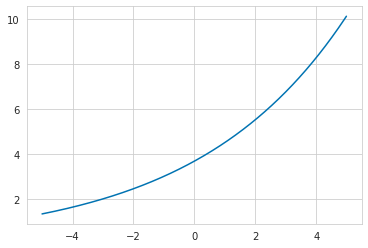

In [136]:
x = np.arange(-5,5,0.01)
plt.plot(x, np.exp(1.303+0.2026*x))


In [137]:
# Проверка
est = LinearRegression()
est.fit(d_train[["day_num"]], d_train.target)
f"w=[{est.intercept_}, {est.coef_[0]}]"

'w=[1.3037437694421916, 0.20264351906815506]'

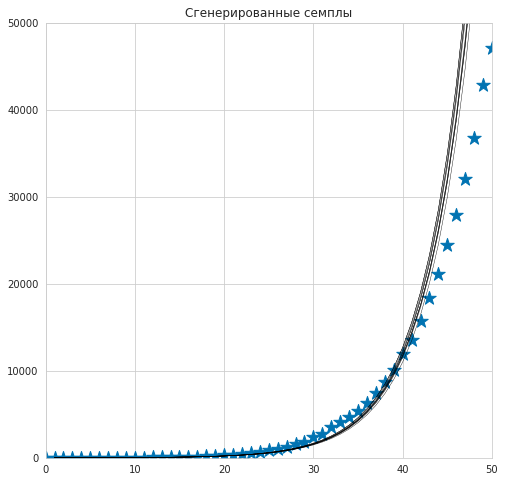

In [140]:
def myplot_sample_lines(mu, sigma, n=20, points=None):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu, sigma, n)

    # plt.axis('equal')
    xs = np.linspace(1, 200, 200)
    for w in my_w:
        ys = np.exp(w[0] + w[1]*xs)
        plt.plot(xs, ys, 'k-', lw=.4)
    plt.ylim((0, 50000))
    plt.xlim((0, 50))
    if not points is None:
        plt.scatter(points[0], points[1], marker='*', s=200)

# Посэмплируем и порисуем прямые
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], 50))
ax.set_ylim((-2, 2))
ax.set_title("Сгенерированные семплы")
myplot_sample_lines(cur_mu, cur_sigma, 10, points=[d_train.day_num, d_train.total_cases])

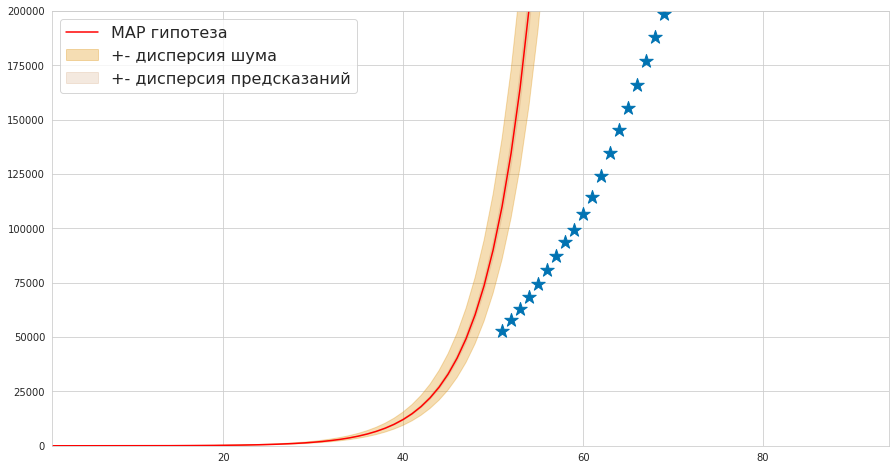

In [116]:
# Посэмплируем прямые и выдадим статистики по предсказаниям
def sample_statistics(mu, sigma, xs, n=20):
    my_w = np.random.multivariate_normal(mu, sigma, n)
    res = np.zeros((n, xs.shape[0]))
    for i,w in enumerate(my_w):
        res[i,:] = np.exp(w[0] + w[1]*xs)
    return res

# Нарисуем результат
def plot_predictions(xs, mu, x, points):
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(111)
    ax.set_xlim((xs[0], 94))
    ax.set_ylim((-2, 2e5))
    # ax.plot(xs, true_curve(xs), label="Правильный ответ")
    ax.plot(xs, np.exp(mu[1]*xs + mu[0]), color="red", label="MAP гипотеза")
    ax.fill_between(
        xs, 
        np.exp(mu[1]*xs + mu[0] - .25), 
        np.exp(mu[1]*xs + mu[0] + .25), 
        color=palette[1], alpha=.3, label="+- дисперсия шума"
    )
    ax.fill_between(
        xs, 
        np.mean(x, axis=0) - np.std(x, axis=0), 
        np.mean(x, axis=0) + np.std(x, axis=0), 
        color=palette[5], alpha=.2, label="+- дисперсия предсказаний"
    )
    ax.scatter(points[0], points[1], marker='*', s=200)
    ax.legend(fontsize=legend_fontsize)

xs = np.linspace(1, 200, 200)
x = sample_statistics(cur_mu, cur_sigma, xs, n=1000)
plot_predictions(xs, cur_mu, x, [d_test.day_num, d_test.total_cases])
# plot_predictions(xs, cur_mu, x, [[d_full.day_num], [d_full.total_cases]])


#### Выводы
1. Большая ошибка на тестовой выборке говорит о том, что модель не смогла правильно выявить закономерность.
2. Результат байесовского обновления совпал с результатом линейной регрессии из sklearn. Что говорит о правильности вычеслений.

### Задание 3
Предсказания экспоненциальной модели наверняка получились грустными. Но это, конечно, чересчур пессимистично — экспоненциальный рост в природе никак не может продолжаться вечно. Кривая общего числа заболевших во время эпидемии в реальности имеет сигмоидальный вид: после начальной фазы экспоненциального роста неизбежно происходит насыщение. В качестве конкретной формы такой сигмоиды давайте возьмём форму функции распределения для гауссиана.

Естественно, в нашем случае сигмоида стремится не к единице, т.е. константа перед интегралом может быть произвольной (и её можно внести в экспоненту), а в экспоненте под интегралом может быть произвольная квадратичная функция от t.
1. Предложите способ обучать параметры такой сигмоидальной функции при помощи линейной регрессии.
2. Обучите эти параметры на датасете случаев коронавируса в России. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели.
3. Посэмплируйте много разных сигмоид из апостериорного распределения, постройте графики. Сколько, исходя из этих сэмплов, будет всего случаев коронавируса в России? Постройте эмпирическое предсказательное распределение, нарисуйте графики. Каков ваш прогноз числа случаев коронавируса в пессимистичном сценарии (90-й процентиль в выборке числа случаев)? В оптимистичном сценарии (10-й процентиль)?


In [141]:
from google.colab import drive
drive.mount("/content/gdrive")
 
from sklearn.linear_model import LinearRegression, SGDRegressor
import numpy as np
import pandas as pd
import datetime

fpath_data = "/content/gdrive/MyDrive/MADE/AML01/owid-covid-data.csv"
start_train = "2020-03-01"
d_full = pd.read_csv(fpath_data, parse_dates=["date"])
d_full = d_full.sort_values("date")

#выберите из таблицы данные по России
d_full = d_full.loc[d_full.location=="Russia"]
d_full = d_full[(start_train <= d_full.date)].reset_index(drop=True)

# для упрощения обработки можно заменить в столбце new_cases все нули на единицы.
d_full.loc[d_full.new_cases==0, "new_cases"] = 1 

def get_train_test(d_full):
  # Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), 
  # начиная с 3 марта
  start_train = "2020-03-01"
  finish_train = datetime.datetime.strptime("2020-03-01", "%Y-%m-%d") + \
    datetime.timedelta(days=50)
  d_train = d_full[(start_train <= d_full.date) & (d_full.date <= finish_train)]

  # остальные данные можно использовать в качестве тестового набора
  d_test = d_full[(finish_train <d_full.date)]
  return (
      d_train.sort_values("date").reset_index(), 
      d_test.sort_values("date").reset_index()
  )


import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
legend_fontsize = 16

d_full["target"] = np.log(d_full.new_cases.values)
d_full["day_num"] = [c for c in d_full.index]
d_full["sq_day_num"] = d_full["day_num"] * d_full["day_num"]
d_train, d_test = get_train_test(d_full)
N = d_train.shape[0]

xs = np.linspace(-5, 5, N)
X = np.linspace(-5, 5, N)
Y = np.linspace(-5, 5, N)
Z = np.linspace(-5, 5, N)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (3,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
pos[:, :, 2] = Z


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [142]:
cur_mu = np.array([0, 0, 0])
cur_sigma = 100*np.array([[1, 0, 0], [0, 1, 0], [0,0,1]])

# здесь нужно использовать логнормальное распределение
Z = np.log(multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma))


In [143]:
def get_likelihood(px, pxx, py, sigma=.025):
    return lambda x : np.exp(
        -(x[0] + x[1]*px + x[2]*pxx - py) ** 2
    ) / (2 * sigma * np.sqrt(2.*np.pi))

px = d_train.day_num[0] 
pxx = d_train.sq_day_num[0]
py = d_train.target[0]

cur_likelihood = get_likelihood(px, pxx, py)
Z = np.array(
  [
    [
      cur_likelihood(pos[i, j]) for j in range(pos.shape[1])
    ] for i in range(pos.shape[0])
  ]
)



In [144]:
def bayesian_update(mu, sigma, x, xx, y, sigma_noise=0.25):
    x_matrix = np.array([[1, x, xx]])
    sigma_n = np.linalg.inv(
        np.linalg.inv(sigma)
        +
        (1 / (sigma_noise ** 2))
        *
        np.matmul(np.transpose(x_matrix), x_matrix)
    )
    mu_n = np.matmul(
        sigma_n, 
        np.matmul(
            np.linalg.inv(sigma), 
            np.transpose(mu)
        ) 
        + 
        (1 / (sigma_noise ** 2)) 
        * 
        np.matmul(np.transpose(x_matrix), np.array([y])) 
    )
    return mu_n, sigma_n


for px, pxx, py in d_train.loc[
    1:,
    ["day_num", "sq_day_num", "target"]
].apply(tuple, axis=1).tolist():
    cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, px, pxx, py)

print("mu=", cur_mu)
print("sigma=\n", cur_sigma)


mu= [-0.82826754  0.27275069 -0.00165736]
sigma=
 [[ 1.21987575e-02 -9.66080151e-04  1.59419148e-05]
 [-9.66080151e-04  9.98165542e-05 -1.83952231e-06]
 [ 1.59419148e-05 -1.83952231e-06  3.60695455e-08]]


In [145]:
ws = []
for _ in range(1000):
  est = SGDRegressor(
      max_iter=1e5, tol=1e-5,
      # alpha=25
  )
  est.fit(
      d_train[["day_num", "sq_day_num"]].astype(np.float128), 
      d_train.target.astype(np.float128)
  )
  ws.append([est.intercept_[0], est.coef_[0], est.coef_[1]])

arr = np.array(ws)
print(
    f"bias = {arr[:, 0].mean():.2f}+/-{arr[:, 0].std():.2f}",
    f"w[x] = {arr[:, 1].mean()}+/-{arr[:, 1].std()} ",
    f"w[x^2] = {arr[:, 2].mean()}+/-{arr[:, 2].std()}]",
    sep="\n"
) 


bias = 598533350.00+/-43871988671.73
w[x] = -4510942924.764092+/-617942738400.8859 
w[x^2] = 22930010888.955368+/-1543990683059.173]


СКО очень большие - коэффициенты не сходятся. Что не дает возможности выполнить проверку.

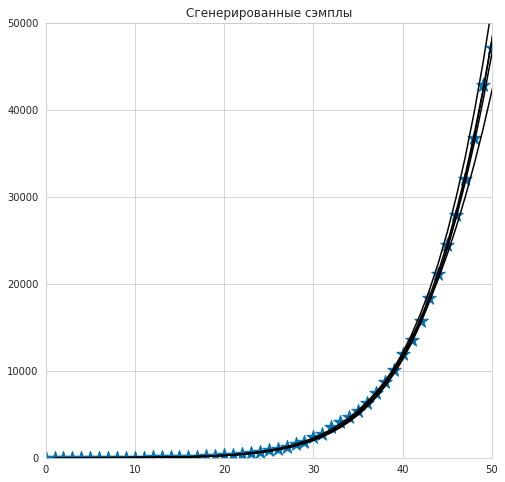

In [146]:
def myplot_sample_lines(mu, sigma, n=20, points=None):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu, sigma, n)

    # plt.axis('equal')
    xs = np.linspace(1, 200, 200)
    for w in my_w:
        # print(w)
        ys = np.exp(w[0] + w[1]*xs + w[2]*xs*xs).cumsum()
        plt.plot(xs, ys, "k-")
    plt.ylim((0, 50000))
    plt.xlim((0, 50))

    if not points is None:
        plt.scatter(x=points[0], y=points[1], marker='*', s=200,)


# Посэмплируем и порисуем прямые
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
# ax.set_xlim((xs[0], xs[-1]))
# ax.set_ylim((-2, 2))
ax.set_title("Сгенерированные сэмплы")

myplot_sample_lines(
    cur_mu, cur_sigma, 5, 
    points=[d_train.day_num.tolist(), d_train.total_cases.tolist()]
)


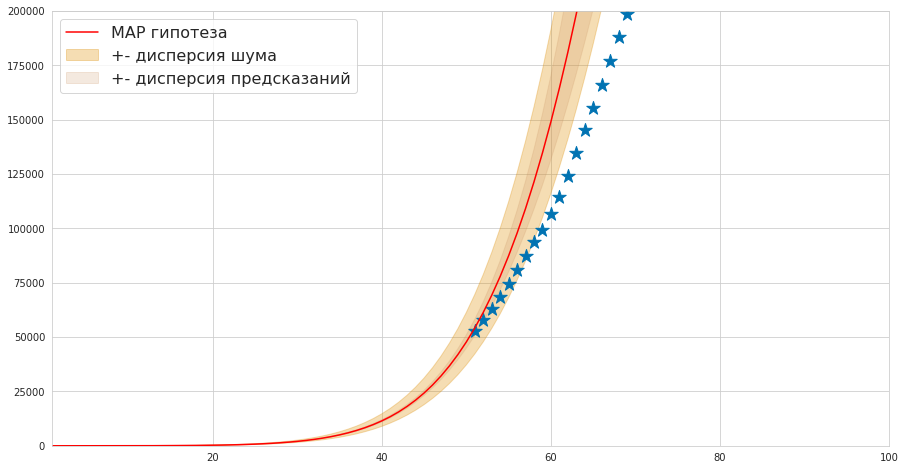

In [147]:
# Посэмплируем прямые и выдадим статистики по предсказаниям
def sample_statistics(mu, sigma, xs, n=20):
    my_w = np.random.multivariate_normal(mu, sigma, n)
    res = np.zeros((n, xs.shape[0]))
    for i,w in enumerate(my_w):
        res[i,:] = np.exp(w[0] + w[1]*xs + w[2]*xs*xs).cumsum()
    return res

# Нарисуем результат
def plot_predictions(xs, mu, x, points):
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(111)
    ax.set_xlim((xs[0], 100))
    ax.set_ylim((-2, 2e5))
    ax.plot(
        xs, 
        np.exp(mu[0] + mu[1]*xs + mu[2]*xs*xs).cumsum(), 
        color="red", label="MAP гипотеза"
    )
    ax.fill_between(
        xs, 
        np.exp(mu[0] + mu[1]*xs + mu[2]*xs*xs - .25).cumsum(), 
        np.exp(mu[0] + mu[1]*xs + mu[2]*xs*xs + .25).cumsum(), 
        color=palette[1], alpha=.3, label="+- дисперсия шума"
    )
    ax.fill_between(
        xs, 
        np.mean(x, axis=0) - np.std(x, axis=0), 
        np.mean(x, axis=0) + np.std(x, axis=0), 
        color=palette[5], alpha=.2, label="+- дисперсия предсказаний"
    )
    ax.scatter(points[0], points[1], marker='*', s=200)
    ax.legend(fontsize=legend_fontsize)

xs = np.linspace(1, 200, 200)
x = sample_statistics(cur_mu, cur_sigma, xs, n=1000)
plot_predictions(xs, cur_mu, x, [[d_test.day_num], [d_test.total_cases]])


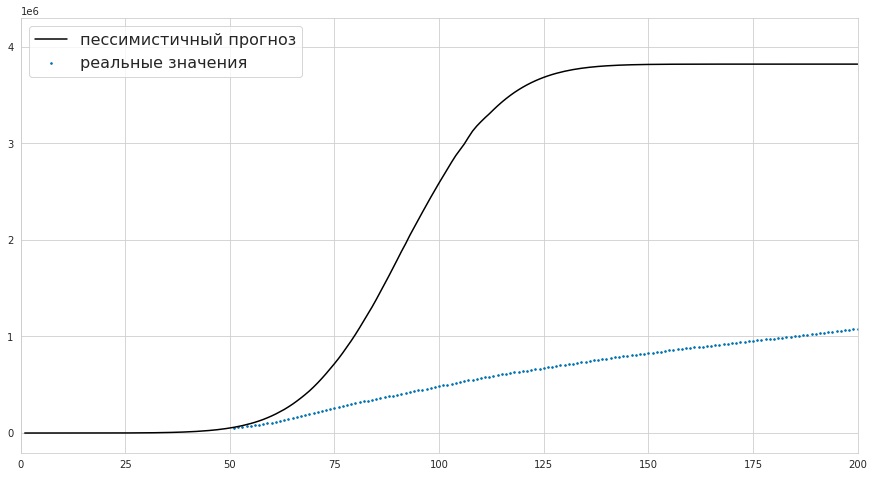

In [151]:
pessimistic = np.percentile(x,90,axis=0)

fig = plt.figure(figsize=(15,8))
plt.plot(xs, pessimistic,"k", label="пессимистичный прогноз")
plt.scatter(d_test.day_num, d_test.total_cases, marker='.', s=10, label="реальные значения")
plt.xlim((0,200))
plt.legend(fontsize=legend_fontsize)


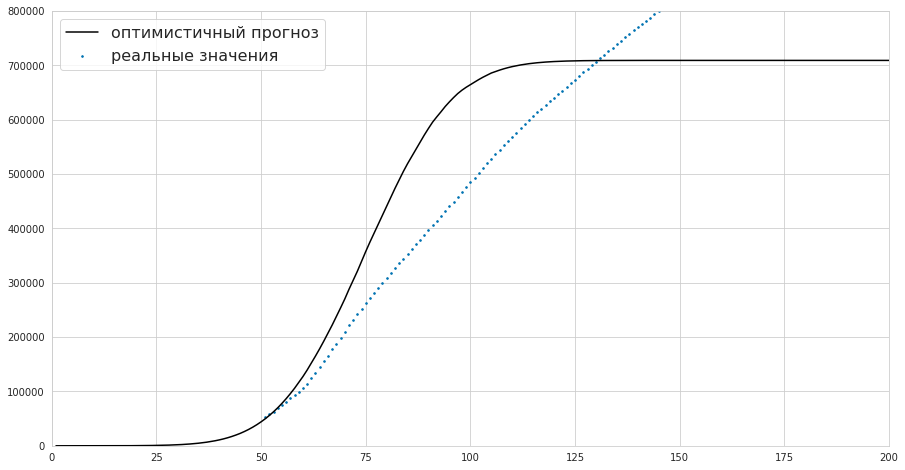

In [152]:
optimistic = np.percentile(x,10,axis=0)

fig = plt.figure(figsize=(15,8))
plt.plot(xs, optimistic,"k", label="оптимистичный прогноз")
plt.scatter(d_test.day_num, d_test.total_cases, marker='.', s=10, label="реальные значения")
plt.xlim((0,200))
plt.ylim((0,8e5))
plt.legend(fontsize=legend_fontsize)

### Задание 4: Бонус
Бонус: проведите такой же анализ для других стран (здесь придётся руками подобрать дни начала моделирования — коронавирус приходил в разные страны в разное время). Насколько разные параметры получаются? Можно ли разделить страны на кластеры (хотя бы чисто визуально) в зависимости от этих параметров?


In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

import numpy as np
import pandas as pd
import datetime

from sklearn.linear_model import LinearRegression
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# кластеры
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans, MeanShift
from sklearn.manifold import TSNE

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()

legend_fontsize = 16
fpath_data = "/content/gdrive/MyDrive/MADE/AML01/owid-covid-data.csv"
import json

map = dict()
data = list()

country = "China"

def read(fpath):
  d_full = pd.read_csv(fpath, parse_dates=["date"])
  d_full = d_full.sort_values("date")
  return d_full


def get_data(df, country):
  # d_full = pd.read_csv(fpath, parse_dates=["date"])
  d_full = df.sort_values("date")
  d_full = d_full.loc[d_full.location==country]
  start_date = d_full.date.min()
  # для упрощения обработки можно заменить в столбце new_cases все нули на единицы.
  # в чате был комментари заменять также и значения меньше 0
  d_full.loc[d_full.new_cases<=0, "new_cases"] = 1 
  d_full = d_full[(start_date <= d_full.date)].reset_index(drop=True)
  d_full["day_num"] = [c for c in d_full.index]
  d_full["sq_day_num"] = d_full["day_num"] * d_full["day_num"]
  d_full["target"] = np.log(d_full.total_cases.values)
  finish_train = start_date + datetime.timedelta(days=50)
  d_train = d_full[d_full.date <= finish_train]
  # остальные данные можно использовать в качестве тестового набора
  d_test = d_full[(finish_train <d_full.date)]
  return d_train, d_test

def get_likelihood(px, pxx, py, sigma=.025):
    return lambda x : np.exp(
        -(x[0] + x[1]*px + x[2]*pxx - py) ** 2
    ) / (2 * sigma * np.sqrt(2.*np.pi))



def bayesian_update(mu, sigma, x, xx, y, sigma_noise=0.25):
    x_matrix = np.array([[1, x, xx]])
    sigma_n = np.linalg.inv(
        np.linalg.inv(sigma)
        +
        (1 / (sigma_noise ** 2))
        *
        np.matmul(np.transpose(x_matrix), x_matrix)
    )
    mu_n = np.matmul(
        sigma_n, 
        np.matmul(np.linalg.inv(sigma), np.transpose(mu)) 
        + 
        (1 / (sigma_noise ** 2)) 
        * 
        np.matmul(np.transpose(x_matrix), np.array([y]) ) 
    )
    return mu_n, sigma_n

d_full = read(fpath_data)
for country in set(d_full.location):
    d_train, d_test = get_data(d_full, country)
    N = d_train.shape[0]

    xs = np.linspace(-5, 5, N)
    X = np.linspace(-5, 5, N)
    Y = np.linspace(-5, 5, N)
    Z = np.linspace(-5, 5, N)
    X, Y = np.meshgrid(X, Y)

    pos = np.empty(X.shape + (3,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y
    pos[:, :, 2] = Z

    cur_mu = np.array([0, 0, 0])
    cur_sigma = 100*np.array([[1, 0, 0], [0, 1, 0], [0,0,1]])

    # здесь нужно использовать логнормальное распределение
    Z = np.log(multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma))

    px = d_train.day_num[0] 
    pxx = d_train.sq_day_num[0]
    py = d_train.target[0]
    cur_likelihood = get_likelihood(px, pxx, py)

    Z = np.array(
      [
        [
          cur_likelihood(pos[i, j]) for j in range(pos.shape[1])
        ] for i in range(pos.shape[0])
      ]
    )
    for px, pxx, py in d_train.loc[
        1:, ["day_num", "sq_day_num", "target"]
    ].apply(tuple, axis=1).tolist():
        cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, px, pxx, py)
    data.append(
        {"country": country, "mu": cur_mu, "sigma": cur_sigma}
    )

df = pd.DataFrame(data)
df = df[df.mu.apply(lambda x: np.isfinite(x).any())]
scaler = StandardScaler()
X = scaler.fit_transform(np.vstack(df.mu.to_list()))

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [77]:
pre_x = np.vstack(df.mu.to_list())
pre_x.mean(axis=0), pre_x.std(axis=0)


(array([ 0.69936006,  0.17483421, -0.00137653]),
 array([1.45286314, 0.13102365, 0.00223758]))

In [72]:
alg = DBSCAN(eps=0.6)
L = alg.fit_predict(X)
L

array([ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,
        0,  0,  1,  1,  1, -1,  0,  0, -1,  0,  0,  0,  1,  0,  0,  0,  1,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0, -1,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0, -1,  0, -1,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0, -1, -1,  1,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0, -1,  0,  0,  0, -1,  0,  0,  1,  0,  0, -1,  0,  0,
        1])

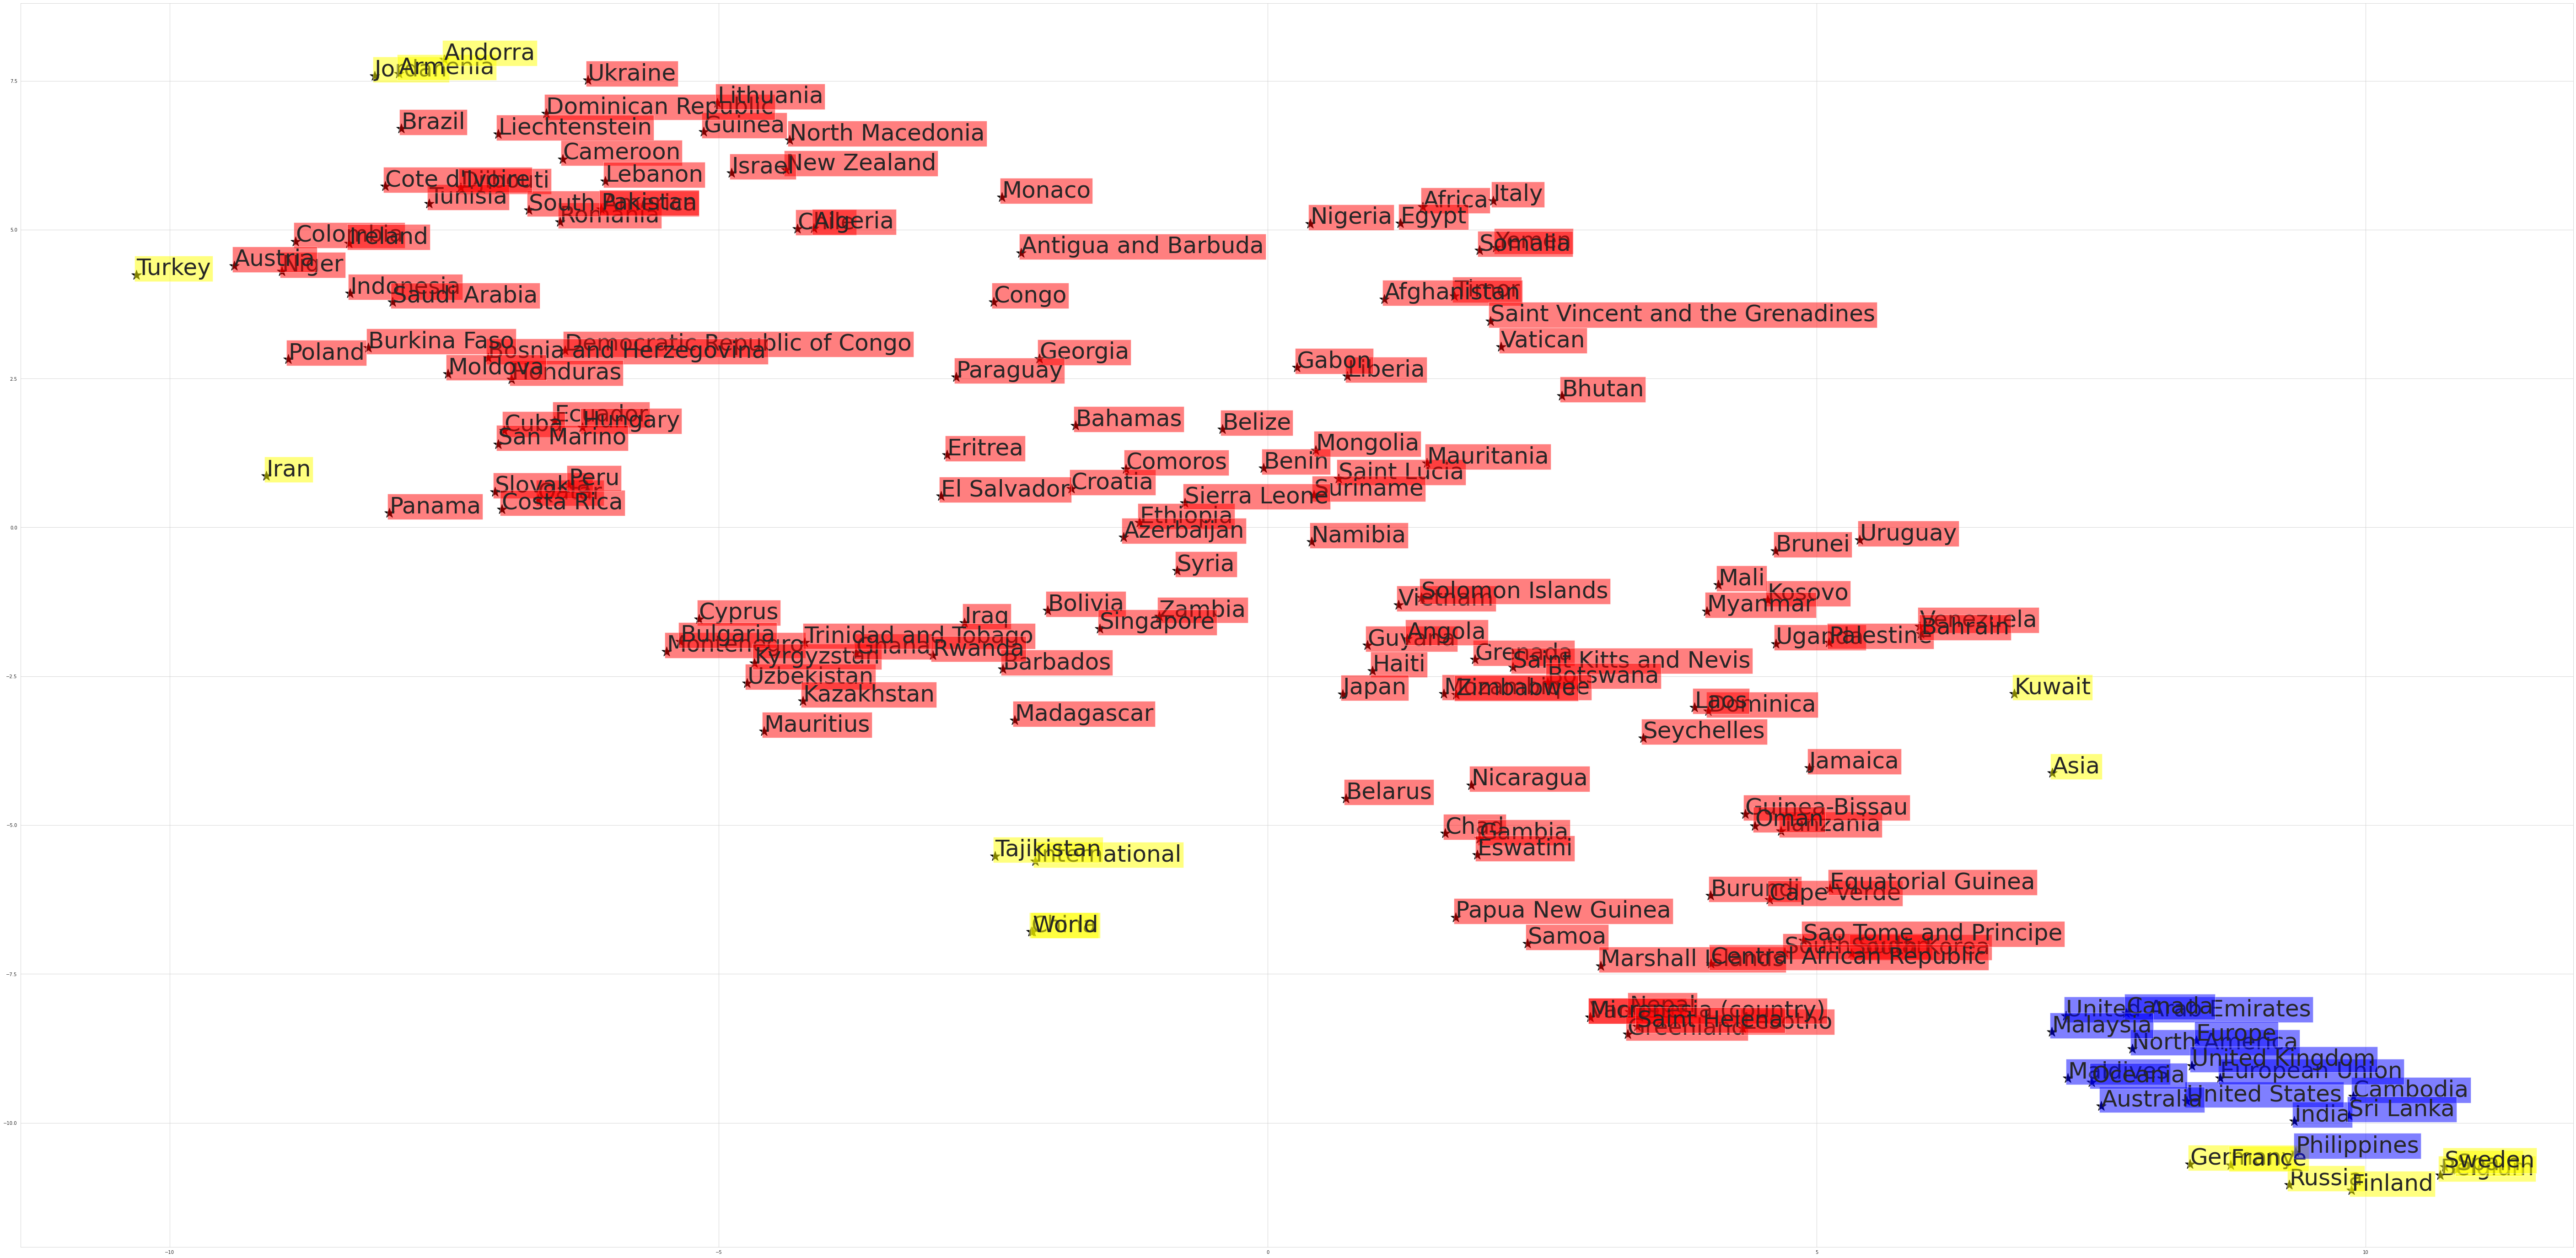

In [73]:
alg = TSNE(n_components=2, init="random")
Y = alg.fit_transform(X)

fig = plt.figure(figsize=(100,50))
plt.scatter(
    Y[:,0],
    Y[:,1],
    # Y[:,1] + np.random.uniform(low=-0.5, high=0.5, size=Y[:,1].shape), 
    c="k", marker='*', s=500
)
colors = ["red", "blue", "yellow"]
for txt, (x,y), pred in zip(df.country, Y, L):
  plt.annotate(txt,(x,y), size=50, bbox=dict(fc=colors[pred], alpha=.5))


Выводы:
 - Метод DBSCAN разбил станы на 2 кластера и шумовые страны.
 - Судя по визуализации методом TSNE выделяется 3-4 кластера.
 - Значения весов для разных стран разбросаны значительно, так как алгоритм плотностной кластеризации смог разбить датасет на кластеры.



In [212]:
# import json
# fout = "/content/gdrive/MyDrive/MADE/AML01/out.json"

# with open(fout, "w") as fp:
#     json.dump(
#         {k: {kk: vv.tolist() for kk,vv in v.items()} for k,v in map.items()}, 
#         fp, 
#         indent=2
#     )

In [182]:
# d_full = pd.read_csv(fpath_data, parse_dates=["date"])
# d_full.location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Europe', 'European Union', 'Faeroe Islands', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambi

In [174]:
d

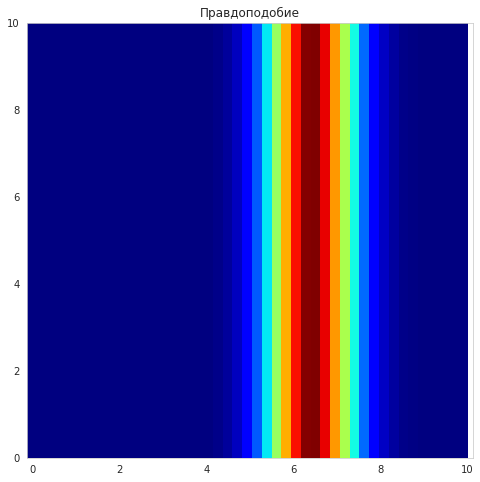

In [174]:
def get_likelihood(px, py, sigma=.025):
    return lambda x : np.exp(-(x[0] + x[1]*px - py) ** 2) / (2 * sigma * np.sqrt(2.*np.pi))

px, py = d_train.day_num[0], d_train.target[0]
cur_likelihood = get_likelihood(px, py)
Z = np.array(
  [
    [
      cur_likelihood(pos[i, j]) for j in range(pos.shape[1])
    ] for i in range(pos.shape[0])
  ]
)

def myplot_heatmap(Z):
    # Make the plot
    plt.axis('equal')
    plt.xlim((0, 10))
    plt.ylim((0, 10))
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlim((-2, 2))
ax.set_ylim((-2, 2))
ax.set_title("Правдоподобие")
myplot_heatmap(Z)


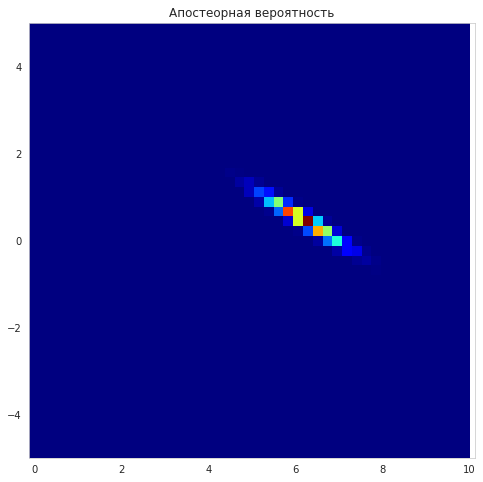

In [167]:
def bayesian_update(mu, sigma, x, y, sigma_noise=0.25):
    x_matrix = np.array([[1, x]])
    sigma_n = np.linalg.inv(
        np.linalg.inv(sigma)
        +
        (1 / (sigma_noise ** 2))
        *
        np.matmul(np.transpose(x_matrix), x_matrix)
    )
    mu_n = np.matmul(
        sigma_n, 
        np.matmul(
            np.linalg.inv(sigma), 
            np.transpose(mu)
        ) 
        + 
        (1 / (sigma_noise ** 2)) 
        * 
        np.matmul(np.transpose(x_matrix), np.array([y]) ) 
    )
    return mu_n, sigma_n

for px, py in d_train.loc[
    1:2,
    ["day_num", "target"]
].apply(tuple, axis=1).tolist():
    cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, px, py)
# px, py = d_train.exp_day_num[1], d_train.total_cases[1]
# cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, px, py)
Z = multivariate_normal.pdf(
    pos, mean=cur_mu, cov=cur_sigma,
    # allow_singular=True
)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-2, 2))
ax.set_title("Апостеорная вероятность")
myplot_heatmap(Z)

In [168]:
for px, py in d_train.loc[
    2:,
    ["day_num", "target"]
].apply(tuple, axis=1).tolist():
    cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, px, py)

print(f"mu={cur_mu}")
print()
print("sigma=")
print(cur_sigma)


mu=[9.42845063 0.03012358]

sigma=
[[ 2.73976137e-03 -4.59399493e-05]
 [-4.59399493e-05  1.03185508e-06]]


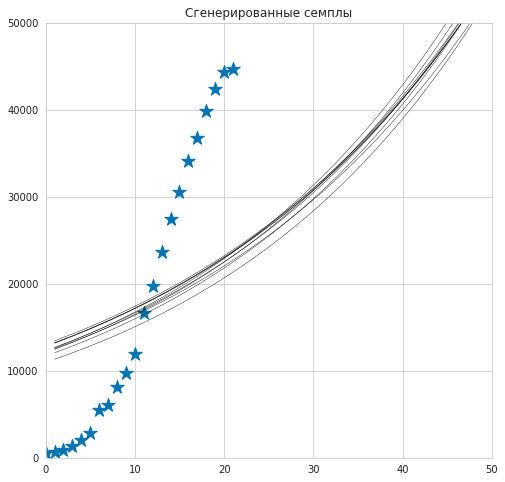

In [172]:
def myplot_sample_lines(mu, sigma, n=20, points=None):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu, sigma, n)

    # plt.axis('equal')
    xs = np.linspace(1, 200, 200)
    for w in my_w:
        ys = np.exp(w[0] + w[1]*xs)
        plt.plot(xs, ys, 'k-', lw=.4)
    plt.ylim((0, 50000))
    plt.xlim((0, 50))
    if not points is None:
        plt.scatter(points[0], points[1], marker='*', s=200)

# Посэмплируем и порисуем прямые
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], 50))
ax.set_ylim((-2, 2))
ax.set_title("Сгенерированные семплы")
myplot_sample_lines(cur_mu, cur_sigma, 10, points=[d_train.day_num, d_train.total_cases])